In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split

import numpy as np




import pandas as pd
from sklearn.model_selection import train_test_split

import numpy as np

df = pd.read_csv('availability.csv')

df.rename(columns={'last_update': 'time_of_day'}, inplace=True)
df = df.drop(columns=["status"])
df['time_of_day'] = pd.to_datetime(df['time_of_day'])

specified_date_time = pd.to_datetime('2024-02-25 15:03:04')

df = df[df['time_of_day'] >= specified_date_time]

df2 = pd.read_csv('weather.csv')
df2['time_of_day'] = pd.to_datetime(df2['time_of_day'])
df2 = df2.drop(columns=["main"])
merged_df = pd.merge_asof(df.sort_values('time_of_day'), df2.sort_values('time_of_day'), 
                          by='station_id', on='time_of_day', direction='nearest')

merged_df['month'] = pd.to_datetime(merged_df['time_of_day']).dt.month
merged_df['day'] = pd.to_datetime(merged_df['time_of_day']).dt.day
merged_df['hour'] = pd.to_datetime(merged_df['time_of_day']).dt.hour
new_df = pd.get_dummies(merged_df, columns=["description","station_id"], prefix='category')
new_df.to_csv("ml_data.csv")







In [67]:
df = pd.read_csv("ml_data.csv")
df = df.sort_values(by='time_of_day')    
df= df.drop(columns=["Unnamed: 0"])


df

,time_of_day,available_bike_stands,bike_stands,available_bikes,temperature,wind_speed,month,day,hour,category_broken clouds,...,category_108,category_109,category_110,category_111,category_112,category_113,category_114,category_115,category_116,category_117
0,2024-02-25 15:03:04,0,30,30,7,9.77,2,25,15,True,...,False,False,False,False,False,False,False,False,False,False
1,2024-02-25 15:03:06,34,40,6,8,9.77,2,25,15,True,...,False,False,False,False,False,False,False,False,False,False
2,2024-02-25 15:03:06,0,30,30,8,9.77,2,25,15,True,...,False,False,False,False,False,False,False,False,False,False
3,2024-02-25 15:03:07,6,30,24,7,9.77,2,25,15,True,...,False,False,False,False,False,False,False,False,False,False
4,2024-02-25 15:03:08,23,23,0,7,9.77,2,25,15,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490185,2024-03-20 22:49:29,26,30,4,6,4.12,3,20,22,False,...,False,False,False,False,False,False,False,False,False,False
490186,2024-03-20 22:49:33,27,35,8,5,4.12,3,20,22,False,...,True,False,False,False,False,False,False,False,False,False
490187,2024-03-20 22:49:34,27,40,13,6,4.12,3,20,22,False,...,False,False,False,False,False,False,False,False,False,False
490188,2024-03-20 22:49:37,37,40,3,6,4.12,3,20,22,False,...,False,False,False,False,False,False,False,False,False,False


In [68]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
import pickle
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit()


In [69]:
train_set, test_set= np.split(df, [int(.7 *len(df))])
X_train = train_set.drop(columns=['available_bikes',"time_of_day","available_bike_stands"])
y_train = train_set['available_bikes']  
X_test = test_set.drop(columns=['available_bikes',"time_of_day","available_bike_stands"])
y_test = test_set['available_bikes'] 



c:\Users\carlo\anaconda3\envs\Pytorch\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [70]:
X_train

,bike_stands,temperature,wind_speed,month,day,hour,category_broken clouds,category_clear sky,category_few clouds,category_fog,...,category_108,category_109,category_110,category_111,category_112,category_113,category_114,category_115,category_116,category_117
0,30,7,9.77,2,25,15,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,40,8,9.77,2,25,15,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,30,8,9.77,2,25,15,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,30,7,9.77,2,25,15,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,23,7,9.77,2,25,15,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343128,30,10,4.63,3,13,16,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
343129,38,10,4.63,3,13,16,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
343130,27,10,4.63,3,13,16,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
343131,40,10,4.63,3,13,16,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [71]:
X_test

,bike_stands,temperature,wind_speed,month,day,hour,category_broken clouds,category_clear sky,category_few clouds,category_fog,...,category_108,category_109,category_110,category_111,category_112,category_113,category_114,category_115,category_116,category_117
343133,25,10,4.63,3,13,16,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
343134,30,10,4.63,3,13,16,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
343135,30,10,4.63,3,13,16,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
343136,20,10,4.63,3,13,16,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
343138,30,10,4.63,3,13,16,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490185,30,6,4.12,3,20,22,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
490186,35,5,4.12,3,20,22,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
490187,40,6,4.12,3,20,22,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
490188,40,6,4.12,3,20,22,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [72]:
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth=20)


DecisionTree = model.fit(X_train, y_train)
result = DecisionTree.predict(X_test).round()

In [73]:
sum(result-y_test)/len(result)

0.055590689324547624

In [75]:
len(result)

147057

In [76]:
X_test_plot = X_test[X_test['category_114'] == True]
y_test_plot = y_test[X_test_plot.index]
result_plot = pd.Series(result, index=X_test.index)
result_plot = result_plot[X_test_plot.index]

result_plot

343167    12.0
343324    12.0
343489    12.0
343542    12.0
343677    12.0
          ... 
489660    12.0
489810    12.0
489872    12.0
489950    12.0
490086    12.0
Length: 1315, dtype: float64

In [77]:
len(X_test_plot)


1315

In [78]:
len(result_plot)

1315

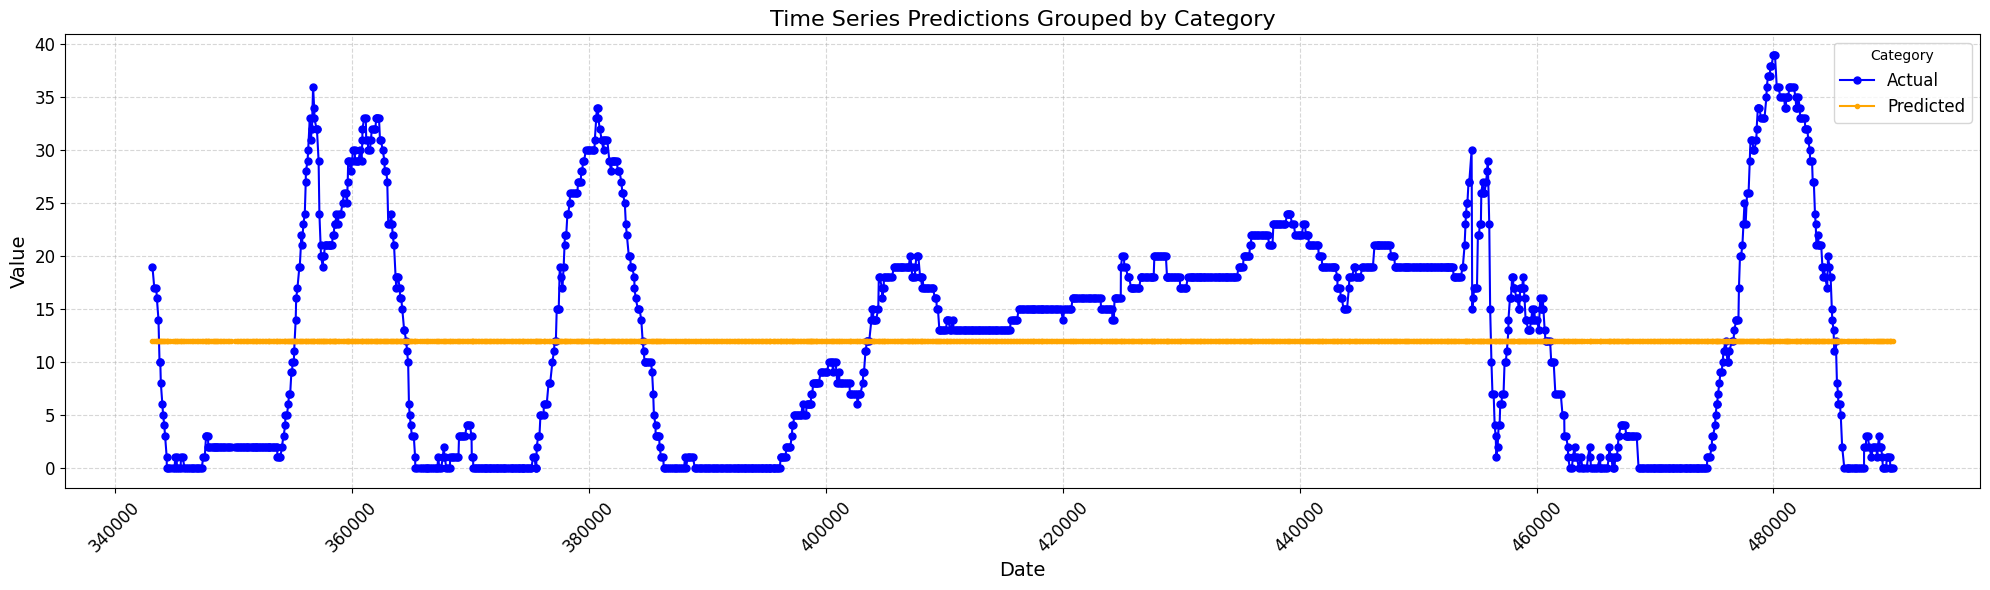

In [79]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(20, 6))

# Plot actual values
plt.plot(X_test_plot.index, y_test_plot, marker='o', markersize=5, color='blue', label='Actual', linestyle='-')

# Plot predicted values
plt.plot(X_test_plot.index, result_plot, marker='o', markersize=3, color='orange', label='Predicted', linestyle='-')

plt.title('Time Series Predictions Grouped by Category', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Category', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
plt.tight_layout()
plt.show()
